# Logistic Regression from Scratch

## Abstract


In this activity i implement a Logistic Regression classifier from scratch to gain a deeper understanding of how the mathematical formulation translates into code. I use the Breast Cancer dataset. The aim is predict when a tumor is malignant (0) or benign (1).

Logistic Regression is a Linear Model for binary classification that turns a weighted sum of the input features (the logit) into a probability using the sigmoid function. In this activity we implemnt this from scratch and using the gradient descend for learn the parameters. We also trak the loss and the training accuracy at each iteration to see how model improve.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [ ]:
# load the data from sklearn
data = load_breast_cancer()
# Split
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name = "target")

# Dataset inspection for futher information
# Shape of the ds
print("X shape:", X.shape)
print("y shape:", y.shape)

# First 5 row of X
print("X first 5 row: \n", X.head())
print("y first 5 row: \n", y.head())

# Information about missing values
print("NaN information:")
print("X:", X.isna().sum().sum())
print("y:", y.isna().sum())


X shape: (569, 30)
y shape: (569,)
X first 5 row: 
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst ra

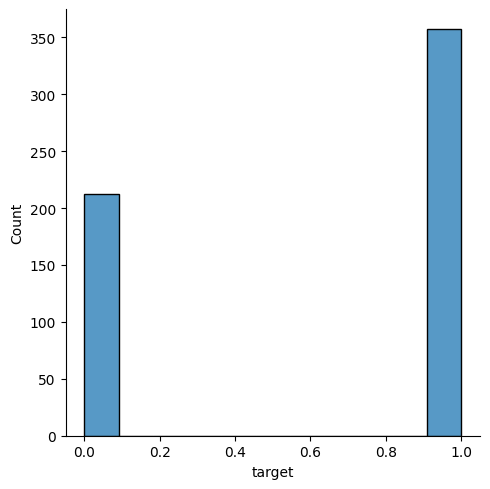

In [ ]:
# class distribution
sns.displot(y)

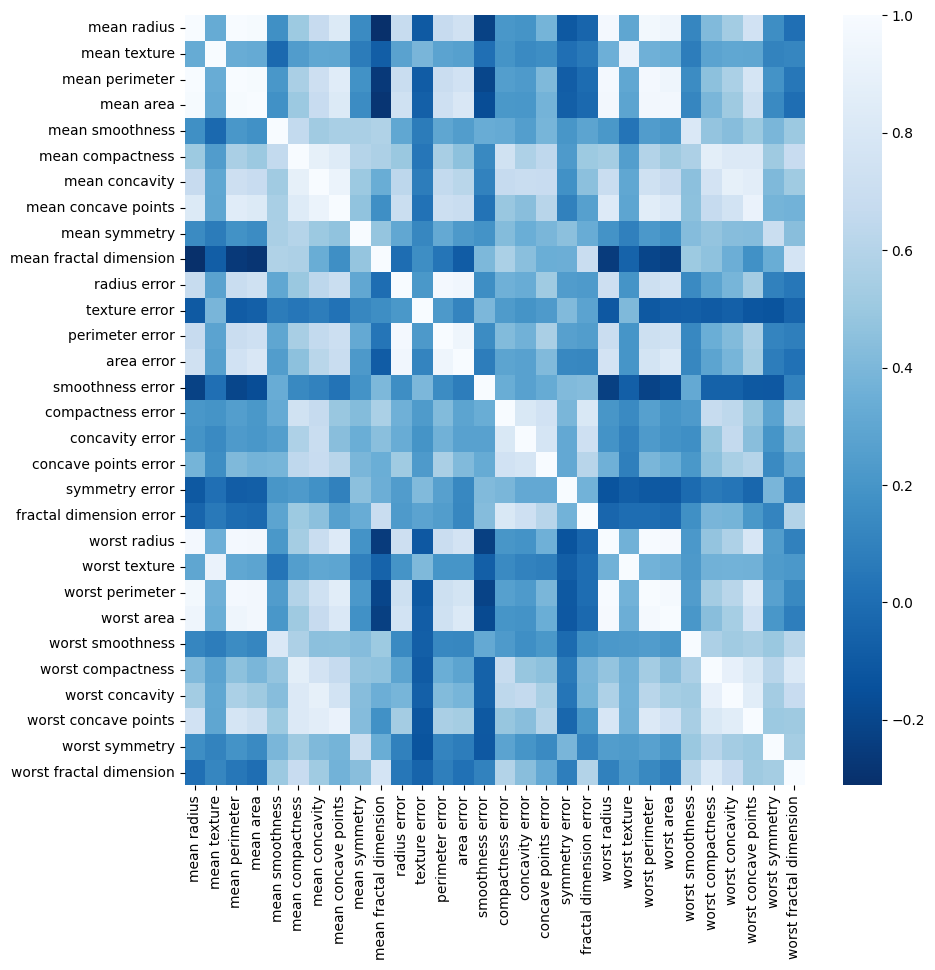

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), cmap='Blues_r')
plt.show()

# Logistic Regression

We consider a binary classification problem with input features $x^{(i)}$ for each instance $i$ from 1 to $m$ and binary labels $y^{(i)}$ in the set {0 1}  

### 1 Linear model and logits

For a parameter vector theta in $R^{(n+1)}$ including a bias term  
the logit is  

$$
z^{(i)} = \theta^T X^{(i)}  ~~~~~~~~~~~~~~(1)
$$

Here $X^{(i)}$ is assumed to include an additional component $X_0^{(i)}$ equal to 1 to model the bias term  

### 2 Sigmoid function

To convert the real valued logit $z^{(i)}$ into a probability in the interval from 0 to 1  
we apply the sigmoid activation function  

$$
\sigma(z) = \frac{1}{1 + e^{-z}}  ~~~~~~~~~~~~~~(2)
$$

this allow us to writhe an output $h$ as:

$$
h_{\theta}^{(i)}(x^{(i)}) = \sigma(z^{(i)})  ~~~~~~~~~~~~~~(3)
$$

where $h_{\theta}^{(i)}(x^{(i)})$ is the estimated probability.

### 3 Likelihood and loss function

In order to maximize probability we need something to maximize.
This $L$ is ours likelihood (loss) function:

$$
L(\theta) = \prod_{i = 1}^{m}[
h_\theta(x^{(i)})]^{y^{(i)}} [1 - h_\theta(x^{(i)})]^{1 - y^{(i)}}  ~~~~~~~~~~~~~~(4)
$$

We improve this Loss Function by negating for descending, insert the log for stability and scaling variance by $\frac{1}{m}$

'Cross-Entropy Loss Function'
$$
J(\theta) =
- \frac{1}{m}
\sum_{i = 1}^{m}
y^{(i)} \ln(h_{\theta}(x^{(i)})) +
(1 - y^{(i)}) \ln(1 - h_{\theta}(x^{(i)}))  ~~~~~~~~~~~~~~(5)
$$

This $J(\theta)$ is the function we want to minimize  

### 4 Gradient of the loss

From the derivation  
the gradient of J(theta) with respect to theta is  

$$
∇_{\theta}J(\theta) = - \frac{1}{m} X^T (h(\theta X) - y)  ~~~~~~~~~~~~~~(6)
$$


### 5 Gradient descent update

To minimize $J(\theta)$ we use gradient descent  
Starting from some initial $\theta$  
we repeat  

$$
\hat{\theta} =
\theta - \alpha ⋅ ∇J(\theta)  ~~~~~~~~~~~~~~(7)
$$

where $\alpha$ greater than zero is the learning rate  




In [ ]:
# Sigmoid activation function
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z)) # (2)

def compute_loss(theta, X_bias, y):
    m = y.size
    z = X_bias @ theta
    h = sigmoid(z)

    # Avoid log(0) by clipping
    eps = 1e-15
    h_c = np.clip(h, eps, 1 - eps)

    J = -(1.0 / m) * np.sum(y * np.log(h_c) + (1 - y) * np.log(1 - h_c))
    return J



# compute the gradient
def calculate_gradient(theta, X, y):
  m = y.size    # number of istances
  return (X.T @ (sigmoid(X @ theta) - y)) / m # (6)

# Gradient descend with learing rate and num of iteration, also put the tollerance
def gradient_descend(X, y, L, num, tol = 1e-7):
  # We need to add an extra dimension with the bias
  X_bias = np.c_[np.ones((X.shape[0], 1)), X]
  theta = np.zeros(X_bias.shape[1])

  loss_history = []
  train_acc_history = []

  for i in range(num): #(7)
    gradient = calculate_gradient(theta, X_bias, y)
    # For the Loss Plot
    J = compute_loss(theta, X_bias, y)          # (5)
    loss_history.append(J)
    # For the Acuracy Plot
    y_pred = predict(X, theta)
    acc = (y_pred == y).mean()
    train_acc_history.append(acc)

    # Gradient step
    theta -= L * gradient
    # If gradient is smaller than tollerance we break, if this happend the computer can't comput number that small so we have probelm
    if np.linalg.norm(gradient) < tol:
      break

  # Return the train paramether
  return theta, loss_history, train_acc_history

# Actual prediction, returning value between 0 - 1
def predict_probabilty(X, theta):   # (3)
  # Insert a Bias again
  X_bias = np.c_[np.ones((X.shape[0], 1)), X]
  # This give the prob between 0 - 1
  return sigmoid(X_bias @ theta)

# For predicting the actual class
def predict(X, theta, treshold = 0.5):
  # Compute the probability and select the class based on the trashold
  return (predict_probabilty(X, theta) >= treshold).astype(int)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## StandardScaler
We apply feature scaling and no other preprocessing. We use StandardScaler:

$$ z = \frac {x - u}{ s} $$
- $ u $ is the mean of the training samples.
- $ s $ standard deviation of the training samples.

Many features have very different ranges; without this scaling, the larger features dominate the distance for gradient-based methods.

In [ ]:
# Split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

# Scale the value as present before
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning rate
L = 0.1
# Number of iteration of the gradient descend
num = 500

# Theta hat is ours value that come from the gradient descend
theta_hat, loss_history, train_acc_history  = gradient_descend(X_train_scaled, y_train, L, num)
# Predict on train and test
y_pred_train = predict(X_train_scaled, theta_hat)
y_pred_test = predict(X_test_scaled, theta_hat)

# Compute the accuracy of train and test split
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9868131868131869
Accuracy test:  0.9824561403508771


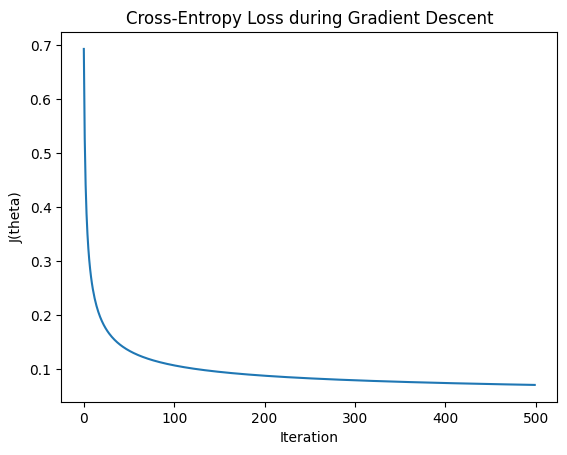

In [ ]:
# Plot Loss over itaration
plt.figure()
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("J(theta)")
plt.title("Cross-Entropy Loss during Gradient Descent")
plt.show()

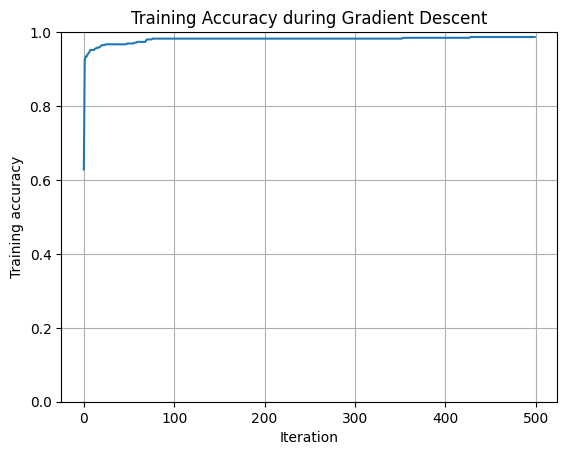

In [ ]:
# Plot training accuracy over iterations
plt.figure()
plt.plot(train_acc_history)
plt.xlabel("Iteration")
plt.ylabel("Training accuracy")
plt.title("Training Accuracy during Gradient Descent")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LinearRegression()
# Fit the model with the training data
model.fit(X_train_scaled, y_train)

# Make prediction on test
y_pred = model.predict(X_test_scaled)

# Convert predictions to binary
y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.956140350877193


## Comparison between Logistic and Linear Regression


Logistic Regression
  - Train accuracy: 0.986
  - Test accuracy: 0.982

Linear Regression
  - Test accuracy: 0.956

 Logistic Regression clearly achieves higher accuracy on this dataset.


**Logistic Regression**

Outputs are probability which has a direct probabilistic interpretation. Is very useful for binary classification by maximizing the likelihood.

**Linear Regression**

 Minimizes the **squared error** between predictions and labels, which is not the ideal objective for classification.

In this experiment, logistic regression not only achieves better accuracy but also provides more meaningful outputs (probabilities).

## Conclusion

In this activity I implemented Logistic Regression from scratch, starting from its mathematical foundations and turning each key equation into code. By applying the model to the Breast Cancer dataset, I could see how the sigmoid transforms the linear combination of features into probabilities, and gradient descent adjusts the parameters to minimize the cross-entropy loss.

Comparing Logistic Regression to Linear Regression used as a classifier also showed why Logistic Regression is more suitable for binary classification, both in terms of accuracy and probabilistic interpretation. Overall, this activity highlights that understanding the math behind the model is essential for implementing and understanding it correctly
